# phase2_result_analyze

2017-05-29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,date,time
import copy
%matplotlib inline

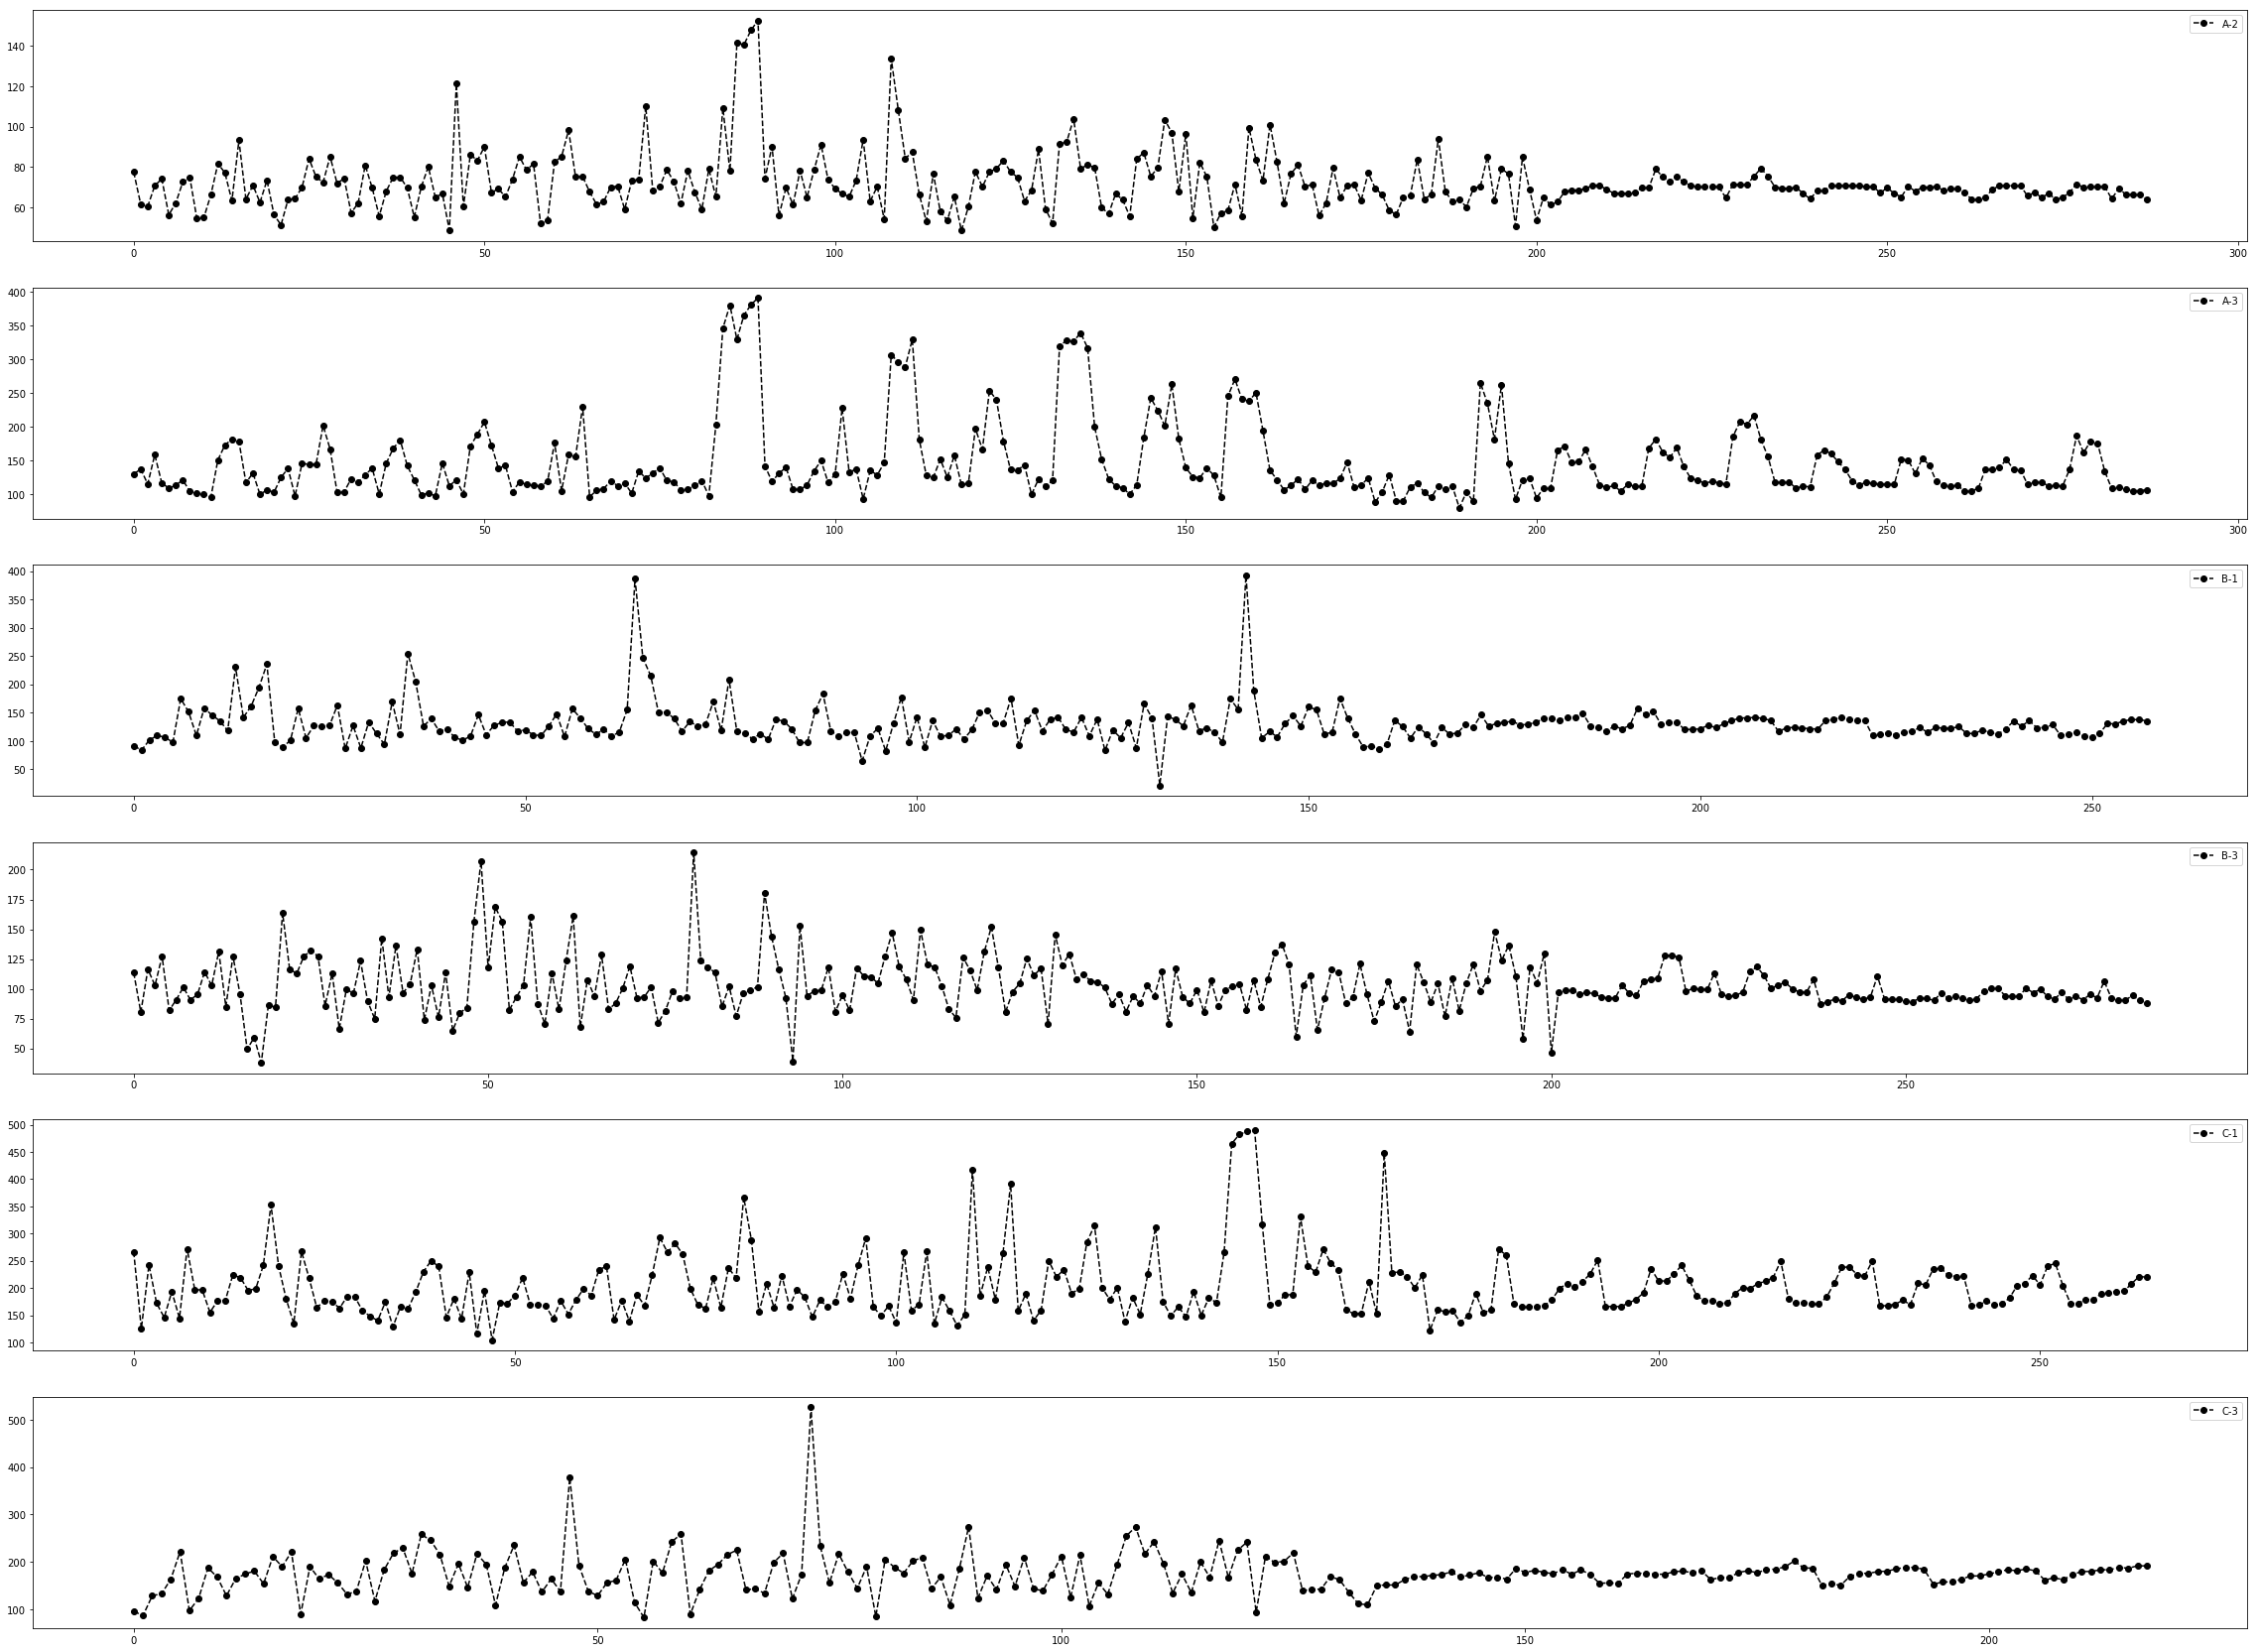

In [24]:
# 录入时间窗数据
raw_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_data/时间窗数据/train_20min_avg_travel_time.csv')
raw_data['start_time'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))

# 选日期
raw_data['date'] = raw_data['start_time'].map(lambda x: x.date())
start_date = date(2016,10,8)
raw_data = raw_data[raw_data['date'] >= start_date]
del raw_data['date']

# 选时间
raw_data['hour'] = raw_data['start_time'].map(lambda x: x.hour)
raw_data = raw_data[(raw_data['hour']==8) | (raw_data['hour']==9) | (raw_data['hour']==17) | (raw_data['hour']==18)]
del raw_data['hour']

raw_data['route'] = raw_data['intersection_id'].astype(str) + '-' + raw_data['tollgate_id'].astype(str)
raw_data = raw_data.sort_values(by=['route', 'start_time'])
raw_data.index = np.arange(len(raw_data))

raw_data_add = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day1/travel_time_submission.csv')
raw_data_add['start_time'] = raw_data_add['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
raw_data_add['route'] = raw_data_add['intersection_id'].astype(str) + '-' + raw_data_add['tollgate_id'].astype(str)


full_travel_time = pd.concat([raw_data, raw_data_add], axis=0)

full_travel_time = full_travel_time.sort_values(by=['intersection_id','tollgate_id','start_time'])

grouped_by_route = full_travel_time.groupby(['route'])
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(40)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(6,1,k)
    k += 1
    ax.plot(np.arange(len(group)), group['avg_travel_time'],'ko--', label=k1)
    ax.legend()

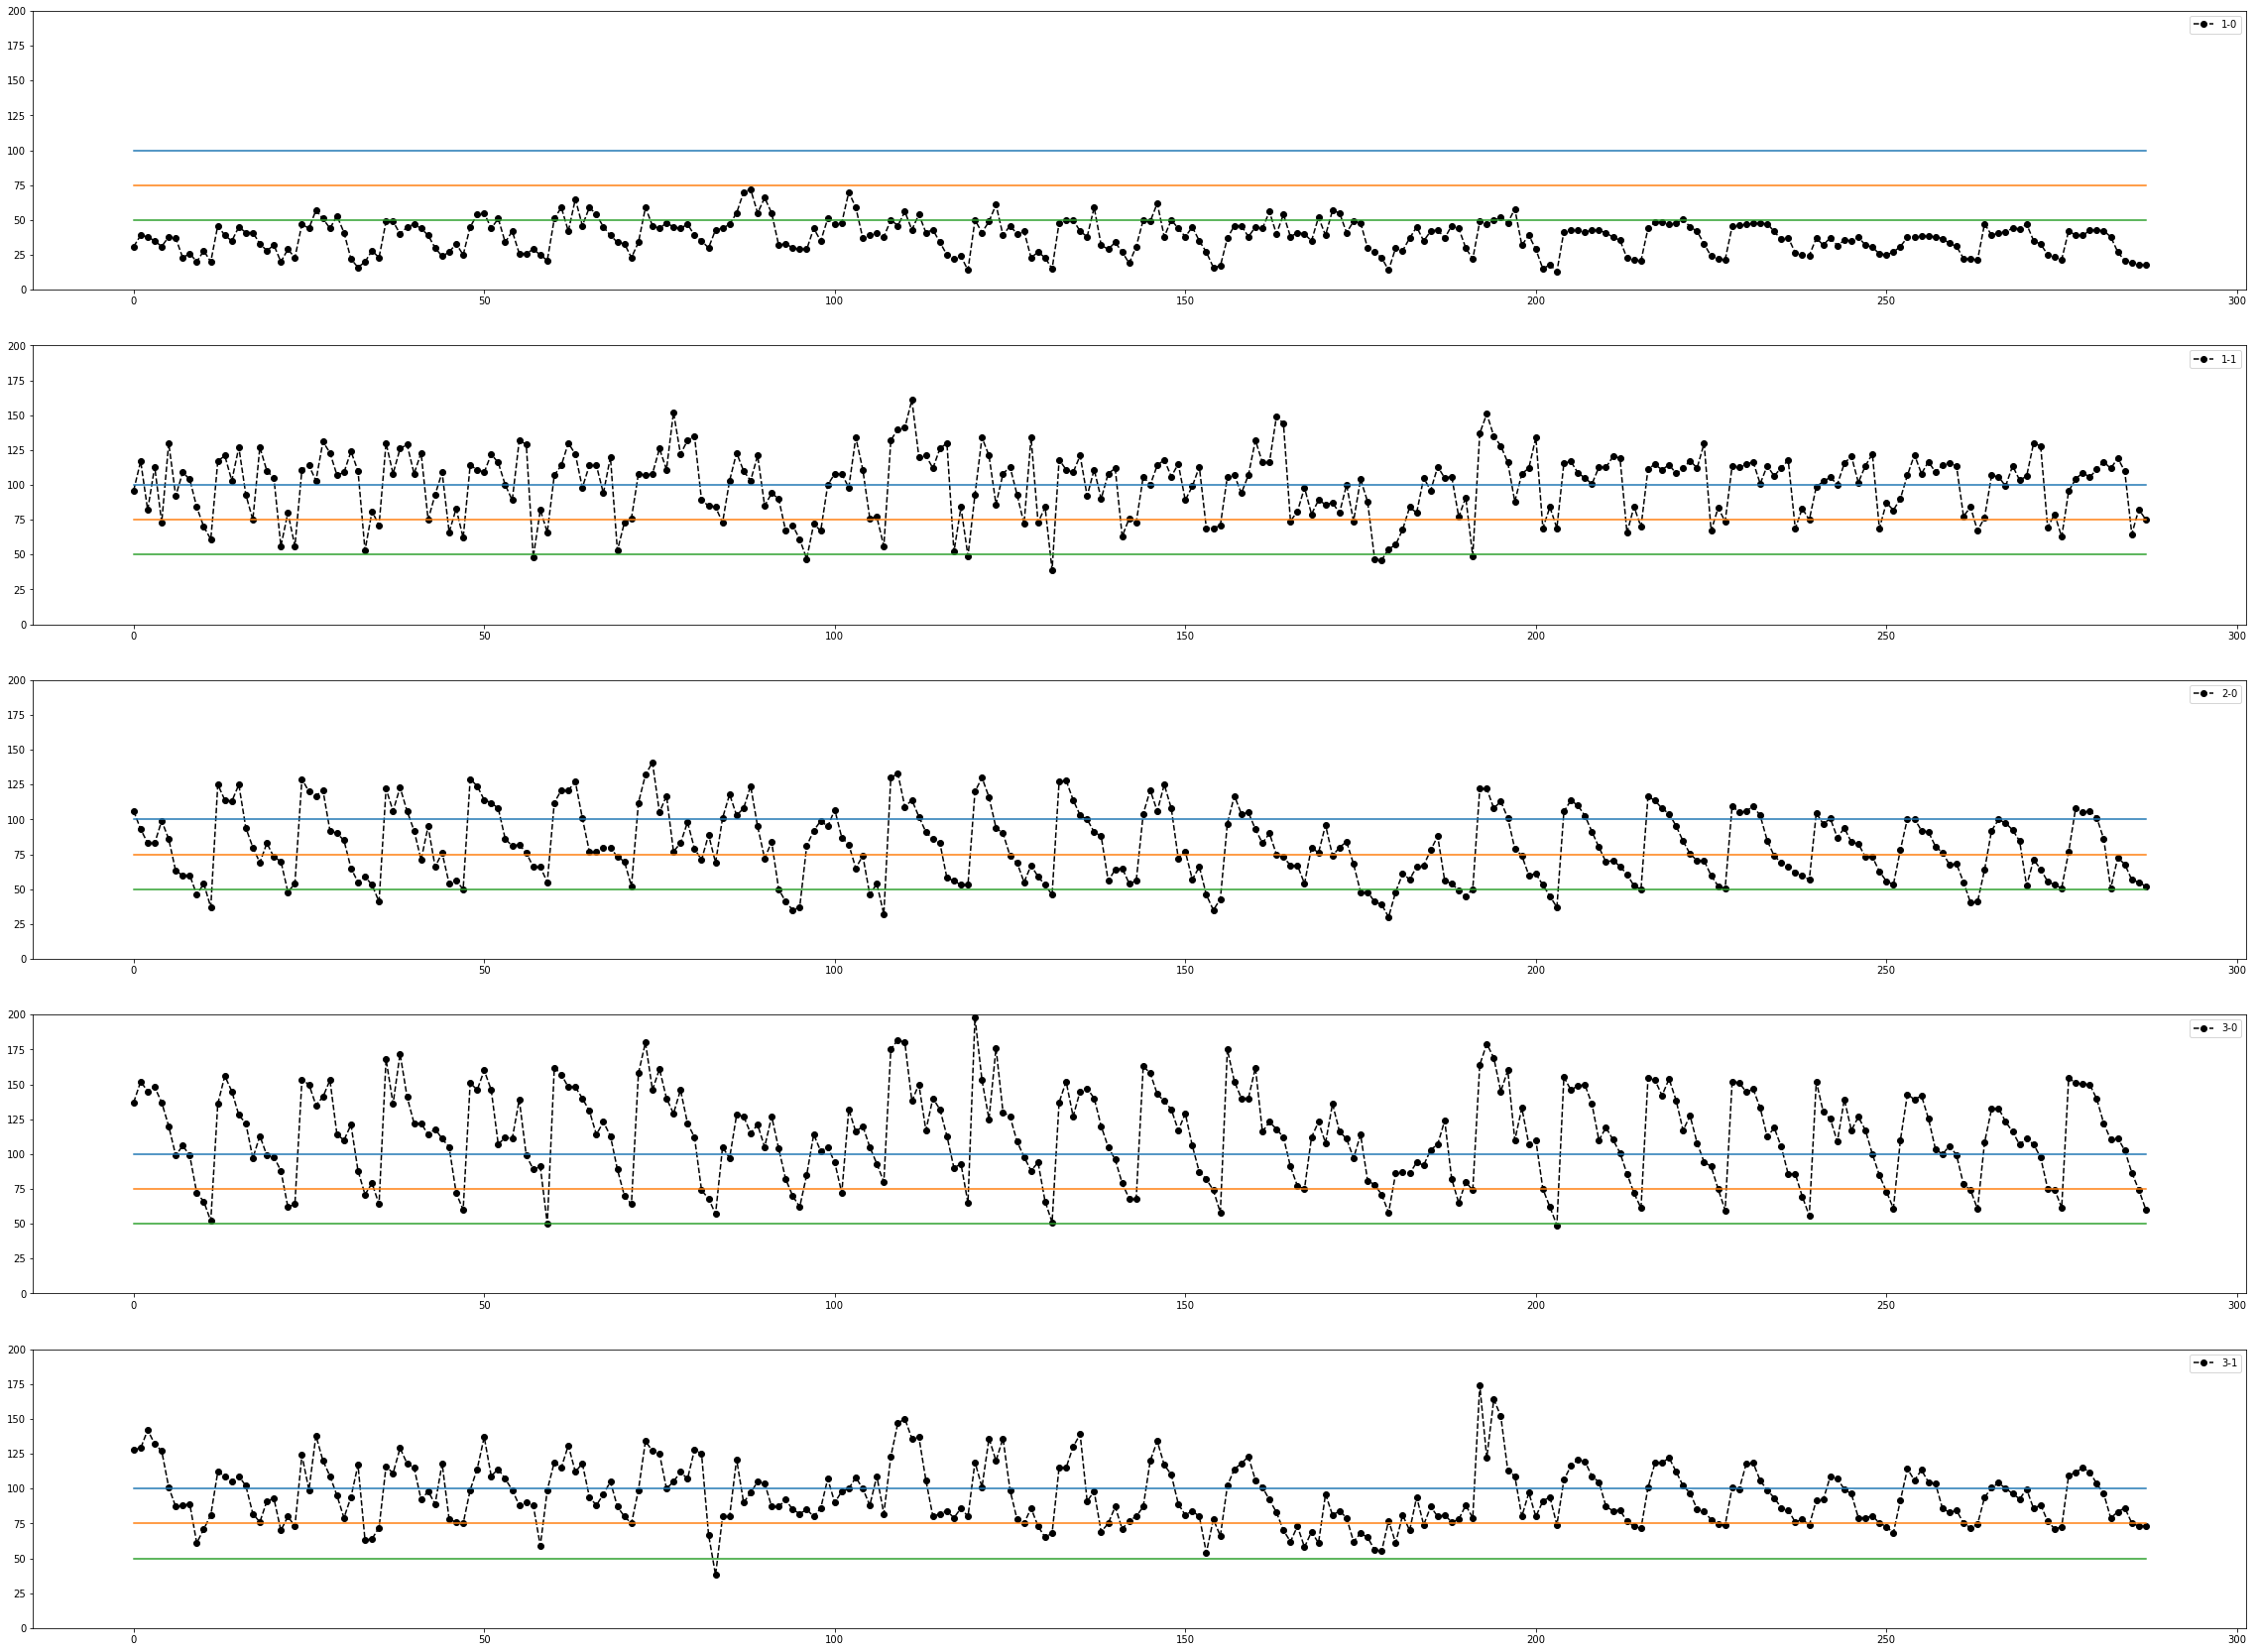

In [25]:
raw_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_data/时间窗数据/train_20min_avg_volume.csv')
raw_data['start_time'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))

# 选日期
raw_data['date'] = raw_data['start_time'].map(lambda x: x.date())
start_date = date(2016,10,8)
raw_data = raw_data[raw_data['date'] >= start_date]
del raw_data['date']

# 选时间
raw_data['hour'] = raw_data['start_time'].map(lambda x: x.hour)
raw_data = raw_data[(raw_data['hour']==8) | (raw_data['hour']==9) | (raw_data['hour']==17) | (raw_data['hour']==18)]
del raw_data['hour']


raw_data['pair'] = raw_data['tollgate_id'].astype(str) + '-' + raw_data['direction'].astype(str)

raw_data_add = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day1/volume_submission.csv')
raw_data_add['start_time'] = raw_data_add['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
raw_data_add['pair'] = raw_data_add['tollgate_id'].astype(str) + '-' + raw_data_add['direction'].astype(str)

full_travel_time = pd.concat([raw_data, raw_data_add], axis=0)

full_travel_time = full_travel_time.sort_values(by=['tollgate_id','direction','start_time'])

grouped_by_pair = full_travel_time.groupby(['pair'])
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(40)
k = 1
for k1, group in grouped_by_pair:  
    ax = fig.add_subplot(5,1,k)
    k += 1
    ax.plot(np.arange(len(group)), group['volume'],'ko--', label=k1)
    ax.plot(np.arange(len(group)), 100*np.ones(len(group)))
    ax.plot(np.arange(len(group)), 75*np.ones(len(group)))
    ax.plot(np.arange(len(group)), 50*np.ones(len(group)))
    ax.set_ylim([0, 200])
    ax.legend()

### 两个阶段的流量融合结果分析

In [2]:
phase1 = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/combination/volume_submission.csv')
phase2 = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day1/volume_submission.csv')
phase3 = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day1/analyze/volume_submission.csv')

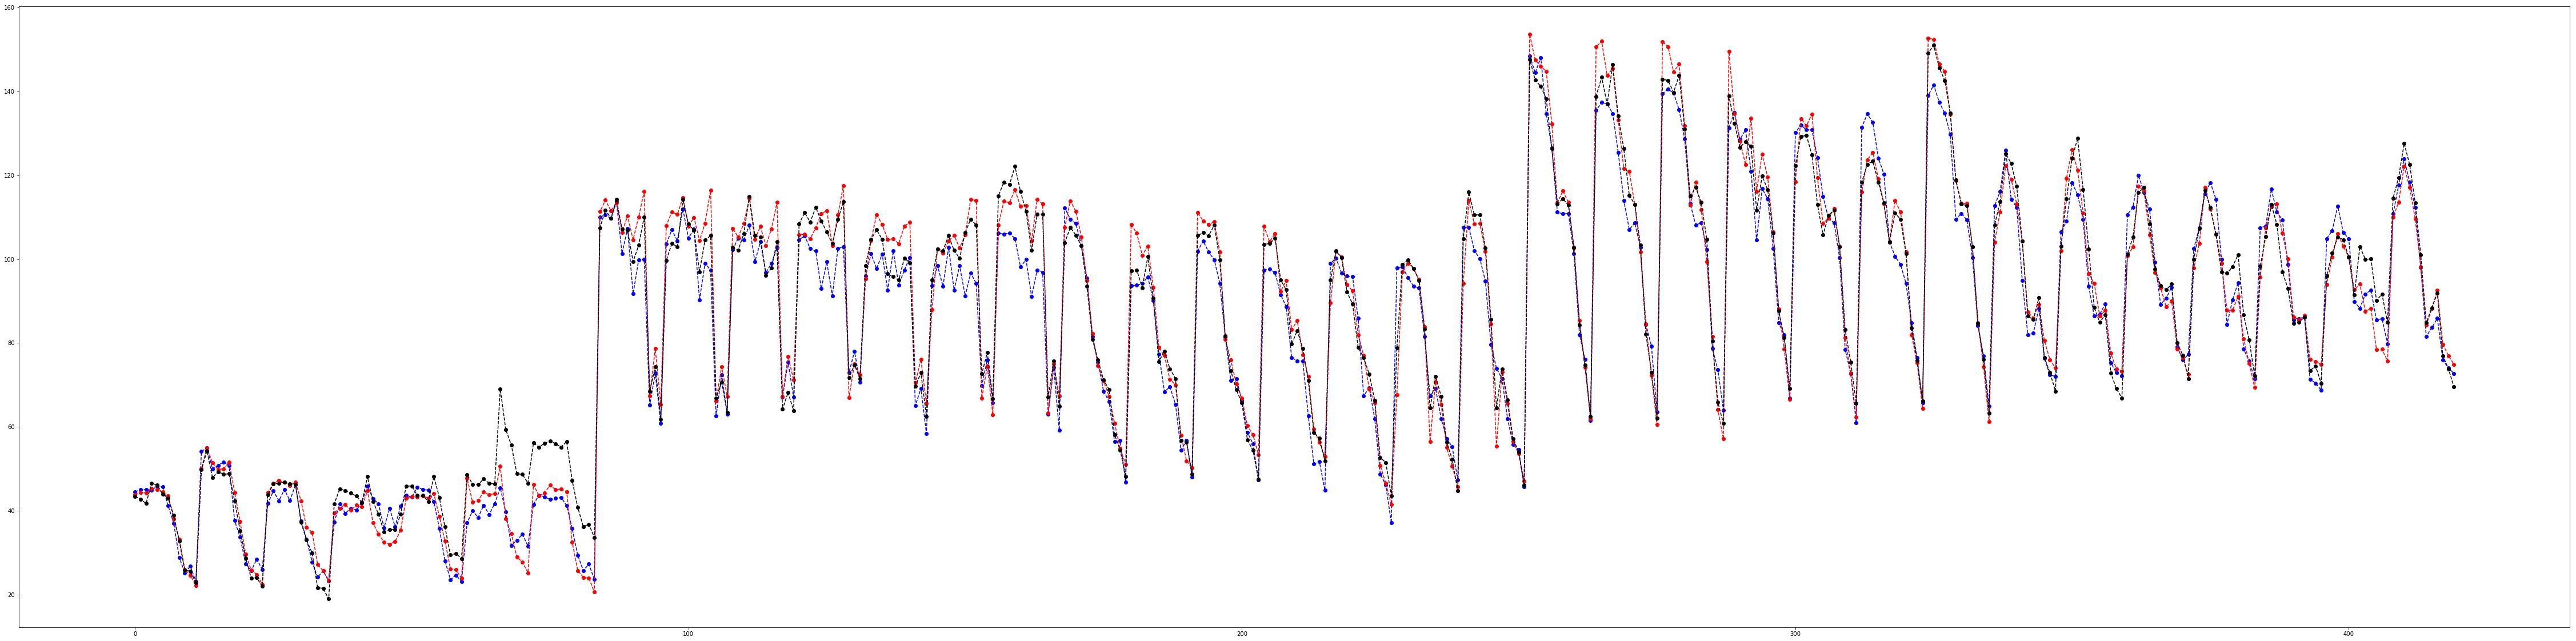

In [3]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(80)
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(phase1)), phase1['volume'], 'b--o')
ax.plot(np.arange(len(phase2)), phase2['volume'], 'r--o')
ax.plot(np.arange(len(phase3)), phase3['volume'], 'k--o')